# Introduction à l'apprentissage automatique

*Maxime Sangnier*

Novembre, 2020

## Contrôle continu

# Table of contents
1. [Consignes](#part1)
1. [Exercice 1 : Application (8 points)](#part2)
    - [Partie 1](#part2sec1)
    - [Partie 2](#part2sec2)
1. [Exercice 2 : Implémentation (12 points)](#part3)


# Consignes <a id="part1"></a>

1. Vos réponses doivent se trouver dans les cellules adéquates de **ce fichier**.
1. En fin d'épreuve, **exportez** votre notebook en fichier `html`.
1. **Téléversez** ensuite les fichiers `ipynb` **et** `html` dans ce dossier distant : [https://www.dropbox.com/request/iAMyQ8B1yUg3inSAVQFx](https://www.dropbox.com/request/iAMyQ8B1yUg3inSAVQFx).
1. La durée de l'épreuve est **1h30**. Tous les documents sont autorisés.

Si vous n’arrivez pas à faire une question, **continuez** quand même l'exercice avec les éléments à votre disposition.

Le barême est donné à titre indicatif.

In [3]:
from sys import path
path.append('../')
from mllab import *


Packages:
	nympy as np
	matplotlib.pyplot as plt
	seaborn as sns

Functions:
	plotXY
	plot_frontiere
	map_regions
	covariance
	plot_cov
	sample_gmm
	scatter
	plot_level_set
	gaussian_sample



In [60]:
from matplotlib import pyplot as plt

# Exercice 1 : Application (8 points) <a id="part2"></a>
## Partie 1 <a id="part2sec1"></a>
>Considérons le jeu de données défini ci-dessous.

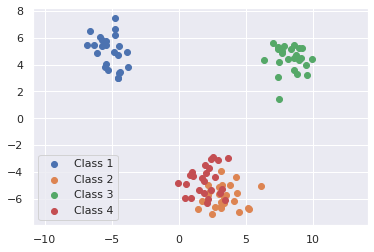

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers = 4, cluster_std=1)
plotXY(X, y)

>**Question 1.**
Appliquer l'algorithme des k-moyennes avec 5 groupes et afficher le partitionnement en résultant.

In [ ]:
# Answer

>**Question 2.**
En remarquant que l'inertie intra-classe fait partie des attributs calculés, afficher l'évolution de cette quantité lorsque le nombre de groupes varie.
Comment peut-on en déduire un nombre de groupes pertinent au regard du jeu de données ?

In [ ]:
# Answer

>**Question 3.**
On s'intéresse maintenant au partitionnement obtenu par un modèle de mélange gaussien.
À l'aide de `sklearn`, réaliser l'estimation pour un mélange de trois gaussiennes et afficher les matrices de covariances estimées.

In [ ]:
# Answer

>**Question 4.**
Modifier à présent les paramètres de l'algorithme EM pour produire des estimateurs diagonaux des matrices de covariance et afficher les estimations (sous la forme de trois matrices).

In [ ]:
# Answer

>**Question 5.**
Afficher l'évolution de l'attribut `lower_bound` en fonction du nombre de composantes dans le mélange.
Que remarque-t-on ? À quoi correspond cet attribut ?

In [ ]:
# Answer

## Partie 2 <a id="part2sec2"></a>
>**Question 1.**
Charger le jeu de données [diabète](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) et l'afficher en deux dimensions grâce à une analyse en composantes principales.
On représentera la variable à expliquer en faisant varier la couleur des points affichés (dans cet objectif, on spécifiera la palette de couleurs `cmap='GnBu'` à `plt.scatter()` et on affichera la barre de couleur).

In [ ]:
# Answer

>**Question 2.**
On souhaite à présent déterminer la plus petite dimension acceptable en vue d'une régression linéaire.
Afficher le score de validation croisée de la régression linéaire en fonction du nombre de composantes principales de l'ACP.

>Quelle dimension choisiriez-vous ?

In [ ]:
# Answer

>**Question 3.**
On fixe maintenant le nombre de dimension à 4 et on considère une [réduction de dimension ISOMAP](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html) en lieu et place de l'ACP.
Tracer l'évolution du score de validation croisée de la régression linéaire en fonction du nombre de plus proches voisins (typiquement entre 15 et 25) de la réduction ISOMAP.

>Est-ce mieux qu'avec l'ACP ?

In [ ]:
# Answer

>**Question 4.**
On souhaite enfin comparer aux arbres de décision, sans réduction de dimension.
Tracer l'évolution du score de validation croisée en fonction de la profondeur de l'arbre.

>Est-ce mieux qu'avec l'ACP ?

In [ ]:
# Answer

# Exercice 2 : Implémentation (12 points) <a id="part3"></a>
>Considérons la matrice symétrique semi-définie positive $Q \in \mathbb R^{n \times n}$ suivante (ici $n=10$), ainsi que le vecteur $y \in \{\pm 1\}^n$ et le paramètre $C>0$.

In [37]:
n = 10
Q = np.random.randn(n, n)
Q = Q @ Q.T

y = np.random.randint(2, size=Q.shape[1]) * 2 - 1

C = 5

>**Question 1.**
Définire une fonction `obj(Q, x)` retournant $f(x)$, où $f : x \in \mathbb R^n \mapsto \frac 12 x^\top Q x - \mathbb 1^\top x$.

>En déduire une fonction `sub_obj(Q, x, i, j, vali, valj)` qui retourne $f(x')$, où $x'$ est défini de sorte que
>- $\forall \ell \in \{1, \dots, n\}\backslash \{i, j\} : x_\ell' = x_\ell$ ;
>- $x_i' =$ `vali` ;
>- $x_j' =$ `valj`.

>Tester vos deux fonctions pour des valeurs arbitraires de $x$, `vali` et `valj`.

In [27]:
# Answer
def obj(Q, x):
    return (1/2)*x.T@Q@x - np.sum(x)

def sub_obj(Q, x, i, j, vali, valj):
    x[i] = vali
    x[j] = valj
    return obj(Q, x)

Q = np.array([[1, 0, 1], [0, 2, 1], [1, 1, 1]])
x = np.array([1, 2, 1])[:, np.newaxis]
print(sub_obj(Q, x, 0, 2, 0, 0))

[[2.]]


>**Question 2.**
Choisir aléatoirement deux valeurs $i \neq j$ dans $\{1, \dots, n\}$ et afficher la courbe des valeurs $f(x')$ en fonction de $x_i'$ pour :
>- $x'$ défini de sorte que $\forall \ell \in \{1, \dots, n\}\backslash \{i, j\} : x_\ell' = 0$ ;
>- $x_i' \in [0, 0.2]$ ;
>- $y^\top x' = 0$.

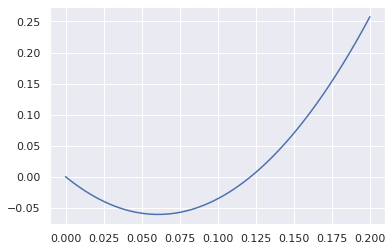

In [67]:
# Answer
def plot_f_xi(i = 3, j = 5, n = 10):
    x_is = np.linspace(0, 0.2, 100)
    f_x = np.zeros_like(x_is)
    for ind, x_i in enumerate(x_is):
        x_j = (y[i] * x_i)/y[j]
        x = np.zeros((n, 1))
        x[i] = x_i
        x[j] = x_j
        f_x[ind] = sub_obj(Q, x, i, j, x_i, x_j)
    plt.plot(x_is, f_x)
plot_f_xi(i = 3, j = 5, n = 10)

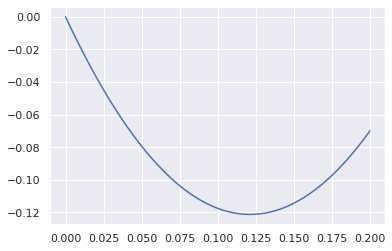

In [65]:
plot_f_xi(i = 1, j = 2, n = 10)

>**Question 3.**
Soient $x \in \mathbb R^n$ un vecteur donné vérifiant $y^\top x = 0$ et $i \neq j$ dans $\{1, \dots, n\}$.
La solution du sous-problème d'optimisation consistant à minimiser $x' \mapsto f(x')$ par rapport à $(x_i', x_j')$ sous les contraintes
\begin{cases}
    \forall \ell \in \{1, \dots, n\}\backslash \{i, j\} : x_\ell' = x_\ell \\
    x_i' \in [0, C] \\
    x_j' \in [0, C] \\
    y^\top x' = 0,
\end{cases}
est décrite ci-dessous.

>Soit $I = \{1, \dots, n\}\backslash \{i, j\}$.
Pour un vecteur $v \in \mathbb R^n$ quelconque, notons alors $v_I = (v_i)_{i \in I} \in \mathbb R^{n-2}$ le sous-vecteur des $n-2$ coordonnées décrites par $I$.
Avec une convention similaire sur les matrices, définissons maintenant :
\begin{cases}
    \alpha = - y_j y_I ^\top x_I \\
    \beta = -y_j y_i \\
    c_i = Q_{I, i} \in \mathbb R^{n-2} \\
    c_j = Q_{I, j} \in \mathbb R^{n-2} \\
    a = Q_{i, i} \\
    b = Q_{i, j} \\
    c = Q_{j, j} \\
    B = (0, -\alpha \beta, C, \beta (C-\alpha)) \text{ et } \sigma \text{ la permutation telle que } B_{\sigma(1)} \leqslant B_{\sigma(2)} \leqslant B_{\sigma(3)} \leqslant B_{\sigma(4)}.
\end{cases}

>La solution $(x_i', x_j')$ du problème sus-mentionné est alors donnée par
$$
    x_i' = \operatorname{proj}_{[B_{\sigma(2)}, B_{\sigma(3)}]} \left( -\frac{(c_i + \beta c_j)^\top x_I + (c\beta + b)\alpha - 1 - \beta}{a + c + 2b\beta} \right)
    \qquad \text{et} \qquad
    x_j' = \alpha + \beta x_i',
$$
où $\operatorname{proj}_{[B_{\sigma(2)}, B_{\sigma(3)}]}(u) = \max(B_{\sigma(2)}, \min(u, B_{\sigma(3)}))$.


>Implémenter ce calcul et le comparer au résultat de $(x_i', x_j')$ donné par `scipy` :

In [18]:
from scipy.optimize import minimize

x = np.zeros(n)

ind = [el for el in range(n) if el not in [i, j]]

res = minimize(lambda val: sub_obj(Q, x, i, j, val[0], val[1]), x0=(0, 0),
               constraints=[dict(type='ineq', fun=lambda u: u),
                            dict(type='ineq', fun=lambda u: C-u),
                            dict(type='eq', fun=lambda u: u@y[[i, j]]+x[ind]@y[ind])])
print(res.x)

[0.1383413 0.1383413]


In [ ]:
# Answer

>**Question 4.**
On souhaite maintenant résoudre le problème d'optimisation visant à minimiser $x \mapsto f(x)$ par rapport à $x$ sous les contraintes
\begin{cases}
    \forall i \in \{1, \dots, n\} : x_i \in [0, C] \\
    y^\top x = 0.
\end{cases}

>Pour ce faire, définir une fonction `solve(Q, y, C, iter=1000)` réalisant l'itération suivante.

>Répéter `iter` fois :
>- choisir aléatoirement deux valeurs $i$ et $j$ dans $\{1, \dots, n\}$ ;
>- si $i \neq j$ :
    - résoudre le sous-problème d'optimisation consistant à minimiser $x' \mapsto f(x')$ par rapport à $(x_i', x_j')$ sous les contraintes
    \begin{cases}
        \forall \ell \in \{1, \dots, n\}\backslash \{i, j\} : x_\ell' = x_\ell \\
        x_i' \in [0, C] \\
        x_j' \in [0, C] \\
        y^\top x' = 0 ;
    \end{cases}
    - mettre à jour les coordonnées $x_i$ et $x_j$ respectivement par $x_i'$ et $x_j'$.

>Comparer le résultat à celui donné par `scipy` :

In [20]:
res = minimize(lambda x: obj(Q, x), x0=np.zeros(n),
               constraints=[dict(type='ineq', fun=lambda x: x),
                            dict(type='ineq', fun=lambda x: C-x),
                            dict(type='eq', fun=lambda x: x@y)])
res.x

array([3.40729655e-15, 4.74626767e-15, 1.68967600e+00, 2.45140178e-01,
       5.35811333e-03, 2.02334592e+00, 2.99320835e+00, 1.77580379e+00,
       2.10135181e+00, 2.09420834e+00])

In [ ]:
# Answer

>**Question 5.**
On se donne le problème de classification suivant.
À l'aide des éléments ci-dessus, résoudre le problème dual des SVM linéaires pour la valeur donnée du paramètre $C$.

>Déterminer les variables primales solutions (une inégalité stricte est numériquement valable à $10^{-9}$ près) et comparer l'ensemble des résultats obtenus à ceux donnés par `sklearn`.

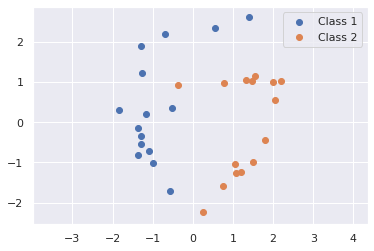

In [22]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=30, n_features=2, n_redundant=0)
y = 2*y - 1  # +1/-1 labels

plotXY(X, y)

In [23]:
from sklearn.svm import SVC

svc = SVC(C=C, kernel='linear')
svc.fit(X, y)

dual_var = np.zeros(X.shape[0])
dual_var[svc.support_] = svc.dual_coef_ * y[svc.support_]

print("Multiplicateurs de Lagrange :", dual_var)
print("Paramètres de l'hyperplan :", svc.coef_, svc.intercept_)

Multiplicateurs de Lagrange : [0.10891676 0.         0.         4.55558442 0.         0.
 5.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 5.         5.         0.         0.         0.         5.
 0.         0.         0.         0.         0.         4.66450118]
Paramètres de l'hyperplan : [[ 1.47659698 -0.68681461]] [-0.21403322]


In [ ]:
# Answer

>**Question 6.**
Compléter la classe suivante, permettant de résoudre le problème SVM linéaire et comparer les résultats produits avec ceux issus de `sklearn`.

In [ ]:
# Answer
class SVM:
    def __init__(self, C=1, n_iter=5000):
        self.C = C
        self.n_iter = n_iter
        
    def fit(self, X, y):
        # To do

        # End to do
        
    def decision_function(self, X):
        # To do

        # End to do
        
    def predict(self, X):
        # To do

        # End to do

In [ ]:
# Answer

>**Question 7.**
Les conditions KKT sont-elles vérifiés pour les candidats retournés par votre implémentation SVM ?

In [ ]:
# Answer